In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path_2019 = "C:/Dev/streamlit_covid/data/obitos-2019.csv"
path_2020 = "C:/Dev/streamlit_covid/data/obitos-2020.csv"
path_2021 = "C:/Dev/streamlit_covid/data/obitos-2021.csv"

data_2019 = pd.read_csv(path_2019)
data_2020 = pd.read_csv(path_2020)
data_2021 = pd.read_csv(path_2021)

print(f'2019 {data_2019.shape}')
print(f'2019 {data_2019.shape}')
print(f'2019 {data_2019.shape}')

2019 (12400, 6)
2019 (12400, 6)
2019 (12400, 6)


In [2]:
data_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [3]:
data_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
13638,MG,SEPTICEMIA,HOSPITAL,> 100,M,41
3167,MA,INDETERMINADA,VIA_PUBLICA,30 - 39,M,1
13984,RS,OUTRAS,OUTROS_SERVICOS_SAUDE,> 100,M,4
14645,PI,COVID,HOSPITAL,N/I,M,5
9297,PA,INDETERMINADA,HOSPITAL,70 - 79,M,5


In [7]:
len(data_2021['uf'].unique())

27

In [9]:
data_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [13]:
data_2019['tipo_doenca'].value_counts()

OUTRAS                        3850
PNEUMONIA                     2356
INSUFICIENCIA_RESPIRATORIA    2328
SEPTICEMIA                    2067
INDETERMINADA                 1310
SRAG                           488
COVID                            1
Name: tipo_doenca, dtype: int64

In [14]:
data_2020['tipo_doenca'].value_counts()

OUTRAS                        3816
INSUFICIENCIA_RESPIRATORIA    2345
PNEUMONIA                     2230
COVID                         2124
SEPTICEMIA                    2040
INDETERMINADA                 1354
SRAG                          1090
Name: tipo_doenca, dtype: int64

In [15]:
data_2021['tipo_doenca'].value_counts()

OUTRAS                        2672
COVID                         1351
INSUFICIENCIA_RESPIRATORIA    1288
PNEUMONIA                     1229
SEPTICEMIA                    1169
INDETERMINADA                  536
SRAG                           446
Name: tipo_doenca, dtype: int64

In [19]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12400 non-null  object
 1   tipo_doenca   12400 non-null  object
 2   local_obito   12400 non-null  object
 3   faixa_etaria  12400 non-null  object
 4   sexo          12398 non-null  object
 5   total         12400 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 581.4+ KB


In [18]:
total_deaths_2019 = data_2019.groupby('tipo_doenca').sum()
total_deaths_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6998
INSUFICIENCIA_RESPIRATORIA,100809
OUTRAS,662115
PNEUMONIA,226536
SEPTICEMIA,175710
SRAG,1500


In [20]:
total_deaths_2020 = data_2020.groupby('tipo_doenca').sum()
total_deaths_2020

,total
tipo_doenca,
COVID,196796
INDETERMINADA,9775
INSUFICIENCIA_RESPIRATORIA,99525
OUTRAS,694924
PNEUMONIA,182907
SEPTICEMIA,163613
SRAG,16646


In [21]:
total_deaths_2021 = data_2021.groupby('tipo_doenca').sum()
total_deaths_2021

,total
tipo_doenca,
COVID,53295
INDETERMINADA,1484
INSUFICIENCIA_RESPIRATORIA,13046
OUTRAS,98104
PNEUMONIA,24303
SEPTICEMIA,24054
SRAG,2266


In [22]:
ratio = total_deaths_2020/total_deaths_2019
ratio

,total
tipo_doenca,
COVID,196796.000000
INDETERMINADA,1.396828
INSUFICIENCIA_RESPIRATORIA,0.987263
OUTRAS,1.049552
PNEUMONIA,0.807408
SEPTICEMIA,0.931154
SRAG,11.097333


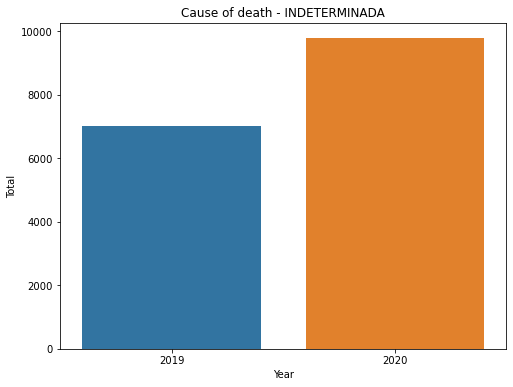

In [36]:
def plot_comparation_graph(death_cause):

    total_2019 = data_2019.groupby('tipo_doenca').sum()
    total_2020 = data_2020.groupby('tipo_doenca').sum()
    total_2021 = data_2021.groupby('tipo_doenca').sum()
    list_SRAG = [int(total_2019.loc[death_cause]), int(total_2020.loc[death_cause])]
    data = pd.DataFrame({'Total': list_SRAG,
                         'Year': [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = 'Year' , y = 'Total', data = data)      
    plt.title(f'Cause of death - {death_cause}')
    plt.show()                     

plot_comparation_graph('INDETERMINADA')    

In [23]:
total_deaths_2019.loc['SRAG']

total    1500
Name: SRAG, dtype: int64

## Desafio 01: Acesar o portal e verificar como são classificados os dados.